<a href="https://colab.research.google.com/github/ayushtankha/TSP/blob/main/TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing Libraries and Dataset

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**DATA HEADER INFO**


NASA/POWER CERES/MERRA2 Native Resolution Daily Data




**Dates (month/day/year): 01/01/2017 through 08/01/2023**
*   Location: Latitude  35.0382   Longitude 9.4849
*   Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 408.34 meters

**The value for missing source data that cannot be computed or is outside of the sources availability range: -**
999 Parameter(s):

*   T2M             MERRA-2 Temperature at 2 Meters (C)

*   WD10M                   MERRA-2 Wind Direction at 10 Meters (Degrees)

*   WS50M                   MERRA-2 Wind Speed at 50 Meters (m/s)



*   RH2M            MERRA-2 Relative Humidity at 2 Meters (%)


*   PRECTOTCORR     MERRA-2 Precipitation Corrected (mm/day)


*   WS10M           MERRA-2 Wind Speed at 10 Meters (m/s)



*   T2MDEW                  MERRA-2 Dew/Frost Point at 2 Meters (C)


*   TS                      MERRA-2 Earth Skin Temperature (C)


*   PS                      MERRA-2 Surface Pressure (kPa)

*   WD50M                   MERRA-2 Wind Direction at 50 Meters (Degrees)



*   ALLSKY_SFC_UV_INDEX     CERES SYN1deg All Sky Surface UV Index (dimensionless)








In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
weather_df = pd.read_csv('/content/drive/MyDrive/Telecom/Sidi Bouzid (Tunisia).csv')

In [44]:
weather_df.head()

,YEAR,MO,DY,WD10M,WS50M,PS,WS10M,WD50M,RH2M,PRECTOTCORR,T2M,T2MDEW,TS,ALLSKY_SFC_UV_INDEX
0,2017,1,1,255.94,4.07,97.83,2.60,257.12,72.38,0.02,5.45,0.42,4.26,0.37
1,2017,1,2,270.38,5.16,97.66,2.96,271.50,69.88,0.00,5.38,-0.34,4.98,0.41
2,2017,1,3,274.81,8.31,97.47,5.34,275.56,56.94,0.00,7.26,-1.64,6.27,0.45
3,2017,1,4,301.25,5.25,97.29,3.33,301.81,71.44,0.04,7.92,2.51,6.88,0.38
4,2017,1,5,309.62,9.86,96.84,6.48,309.75,77.31,0.22,8.33,4.39,7.76,0.38


In [45]:
weather_df.describe()

,YEAR,MO,DY,WD10M,WS50M,PS,WS10M,WD50M,RH2M,PRECTOTCORR,T2M,T2MDEW,TS,ALLSKY_SFC_UV_INDEX
count,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000
mean,2019.810316,6.303661,15.714642,196.107879,5.635437,96.944780,3.992845,198.021610,54.919605,0.787978,18.795212,7.543744,19.746760,-100.639651
std,1.909904,3.420966,8.801180,77.015884,2.084117,0.509106,1.506751,76.737674,15.130924,2.705656,8.228245,5.012507,9.175872,302.690547
min,2017.000000,1.000000,1.000000,19.250000,1.380000,94.630000,1.070000,14.810000,13.310000,0.000000,3.470000,-6.310000,3.050000,-999.000000
25%,2018.000000,3.000000,8.000000,137.515000,4.050000,96.650000,2.900000,139.937500,43.925000,0.000000,11.697500,3.540000,11.680000,0.450000
50%,2020.000000,6.000000,16.000000,199.500000,5.260000,96.910000,3.700000,203.310000,55.530000,0.010000,17.860000,7.800000,18.795000,1.060000
75%,2021.000000,9.000000,23.000000,255.955000,6.950000,97.240000,4.820000,257.152500,66.895000,0.290000,25.980000,11.340000,27.762500,1.900000
max,2023.000000,12.000000,31.000000,346.500000,17.370000,98.590000,13.480000,346.060000,91.310000,44.780000,37.180000,20.560000,38.900000,2.880000


In [47]:
weather_df.info()

# 13 features in total and 2404 data points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 2404 non-null   int64  
 1   MO                   2404 non-null   int64  
 2   DY                   2404 non-null   int64  
 3   WD10M                2404 non-null   float64
 4   WS50M                2404 non-null   float64
 5   PS                   2404 non-null   float64
 6   WS10M                2404 non-null   float64
 7   WD50M                2404 non-null   float64
 8   RH2M                 2404 non-null   float64
 9   PRECTOTCORR          2404 non-null   float64
 10  T2M                  2404 non-null   float64
 11  T2MDEW               2404 non-null   float64
 12  TS                   2404 non-null   float64
 13  ALLSKY_SFC_UV_INDEX  2404 non-null   float64
dtypes: float64(11), int64(3)
memory usage: 263.1 KB


## 2. Data Visualization

<Axes: >

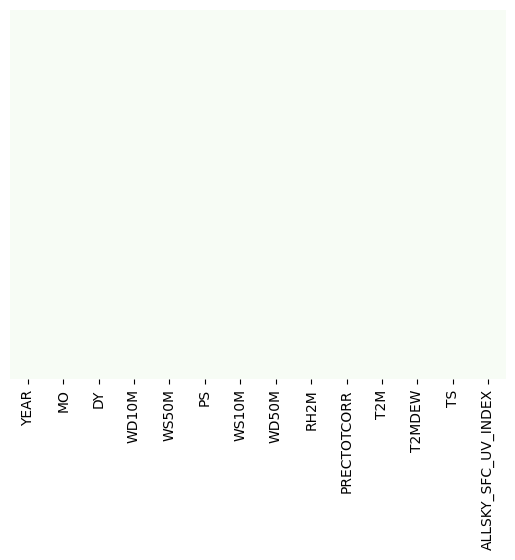

In [48]:
#Checking for null values in dataset

sns.heatmap(weather_df.isnull(), yticklabels = False, cbar = False, cmap = 'Greens')

array([[<Axes: title={'center': 'YEAR'}>, <Axes: title={'center': 'MO'}>,
        <Axes: title={'center': 'DY'}>,
        <Axes: title={'center': 'WD10M'}>],
       [<Axes: title={'center': 'WS50M'}>,
        <Axes: title={'center': 'PS'}>,
        <Axes: title={'center': 'WS10M'}>,
        <Axes: title={'center': 'WD50M'}>],
       [<Axes: title={'center': 'RH2M'}>,
        <Axes: title={'center': 'PRECTOTCORR'}>,
        <Axes: title={'center': 'T2M'}>,
        <Axes: title={'center': 'T2MDEW'}>],
       [<Axes: title={'center': 'TS'}>,
        <Axes: title={'center': 'ALLSKY_SFC_UV_INDEX'}>, <Axes: >,
        <Axes: >]], dtype=object)

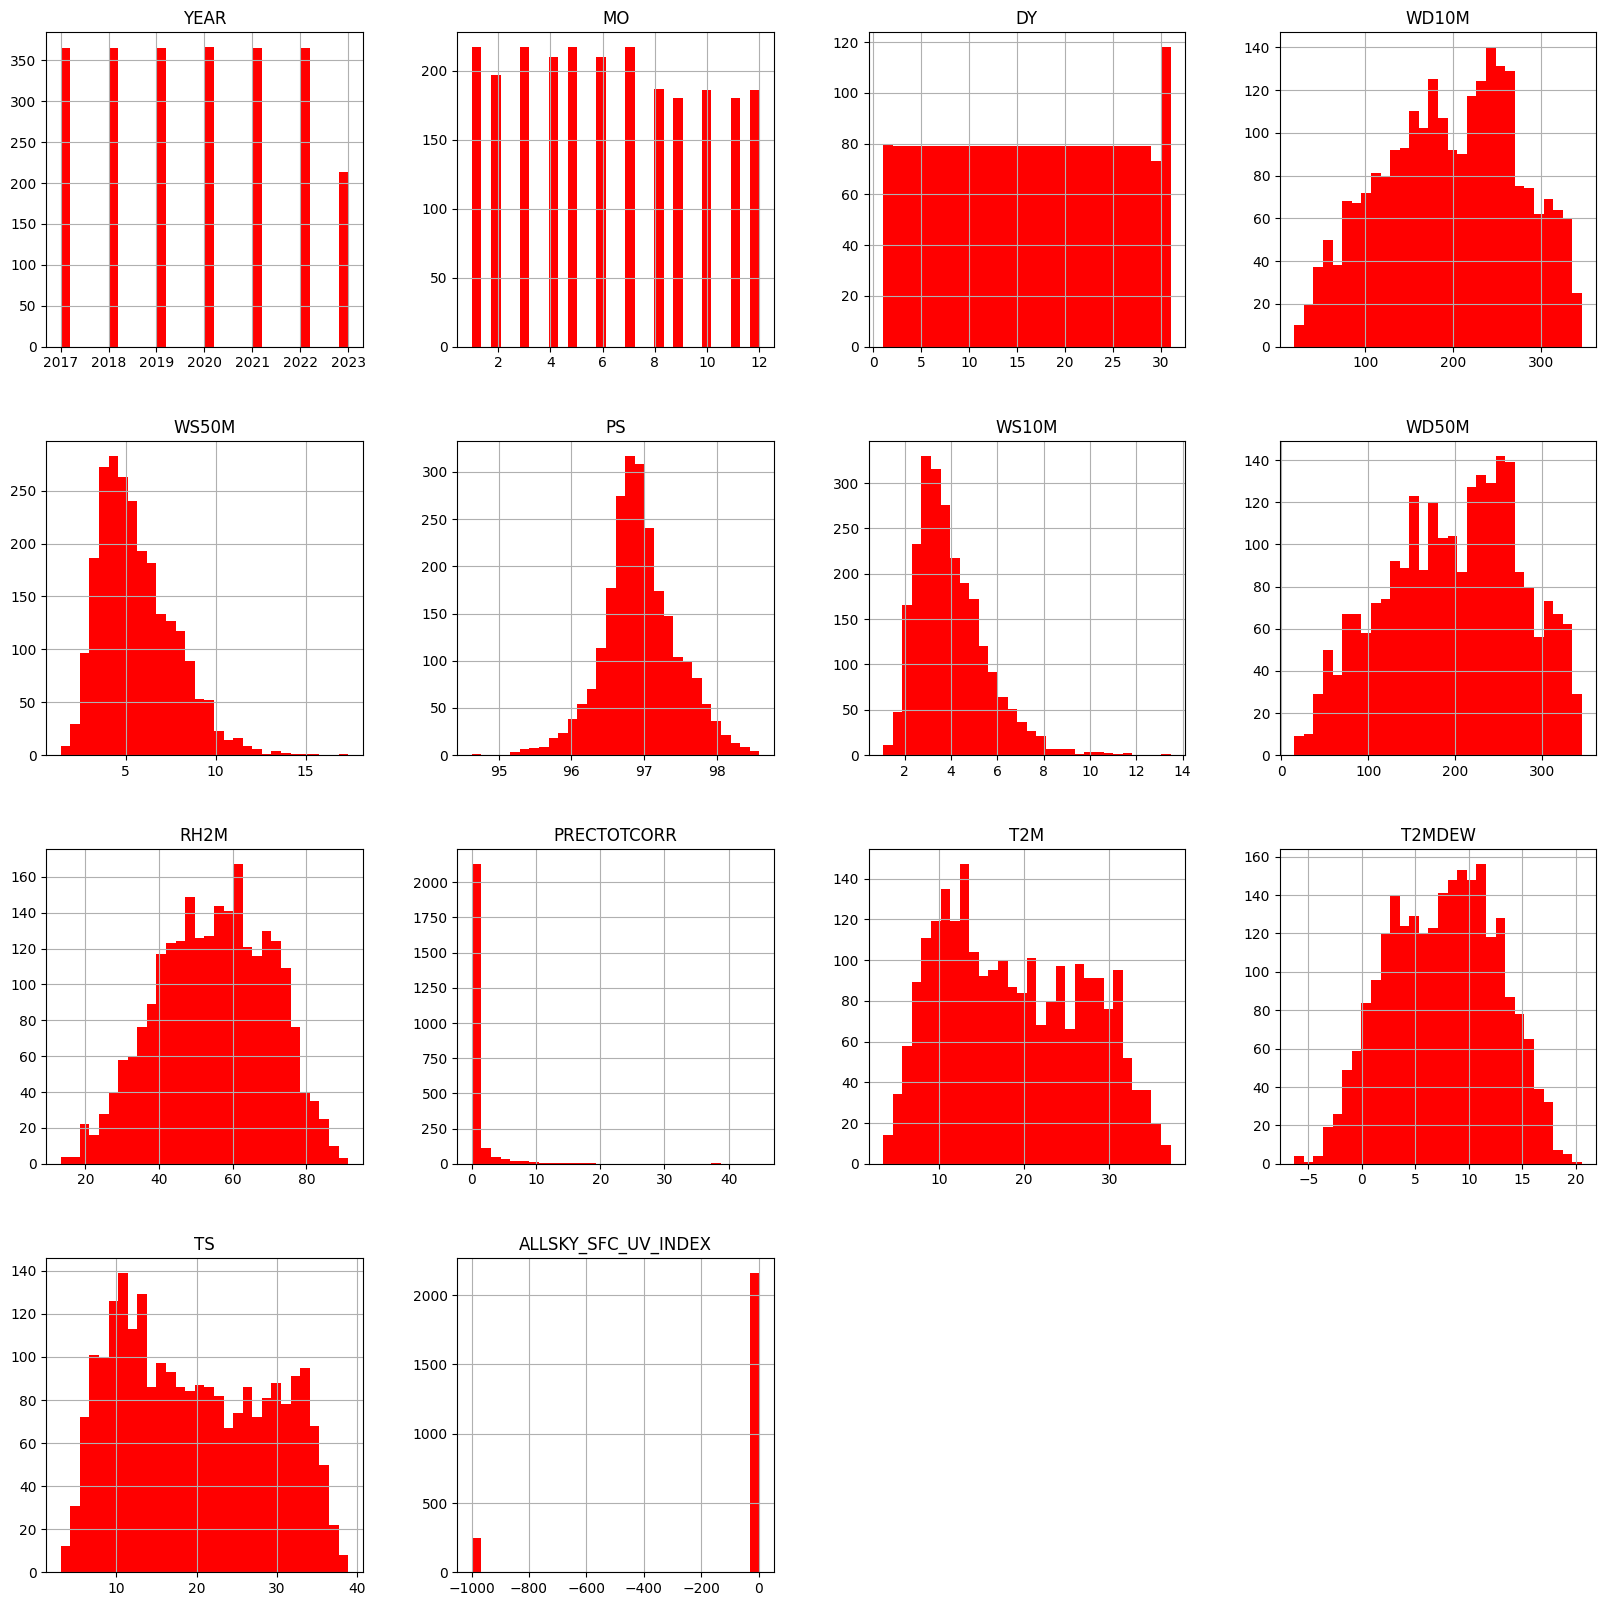

In [49]:
weather_df.hist(bins = 30, figsize = (20,20), color = 'r' )

<Axes: >

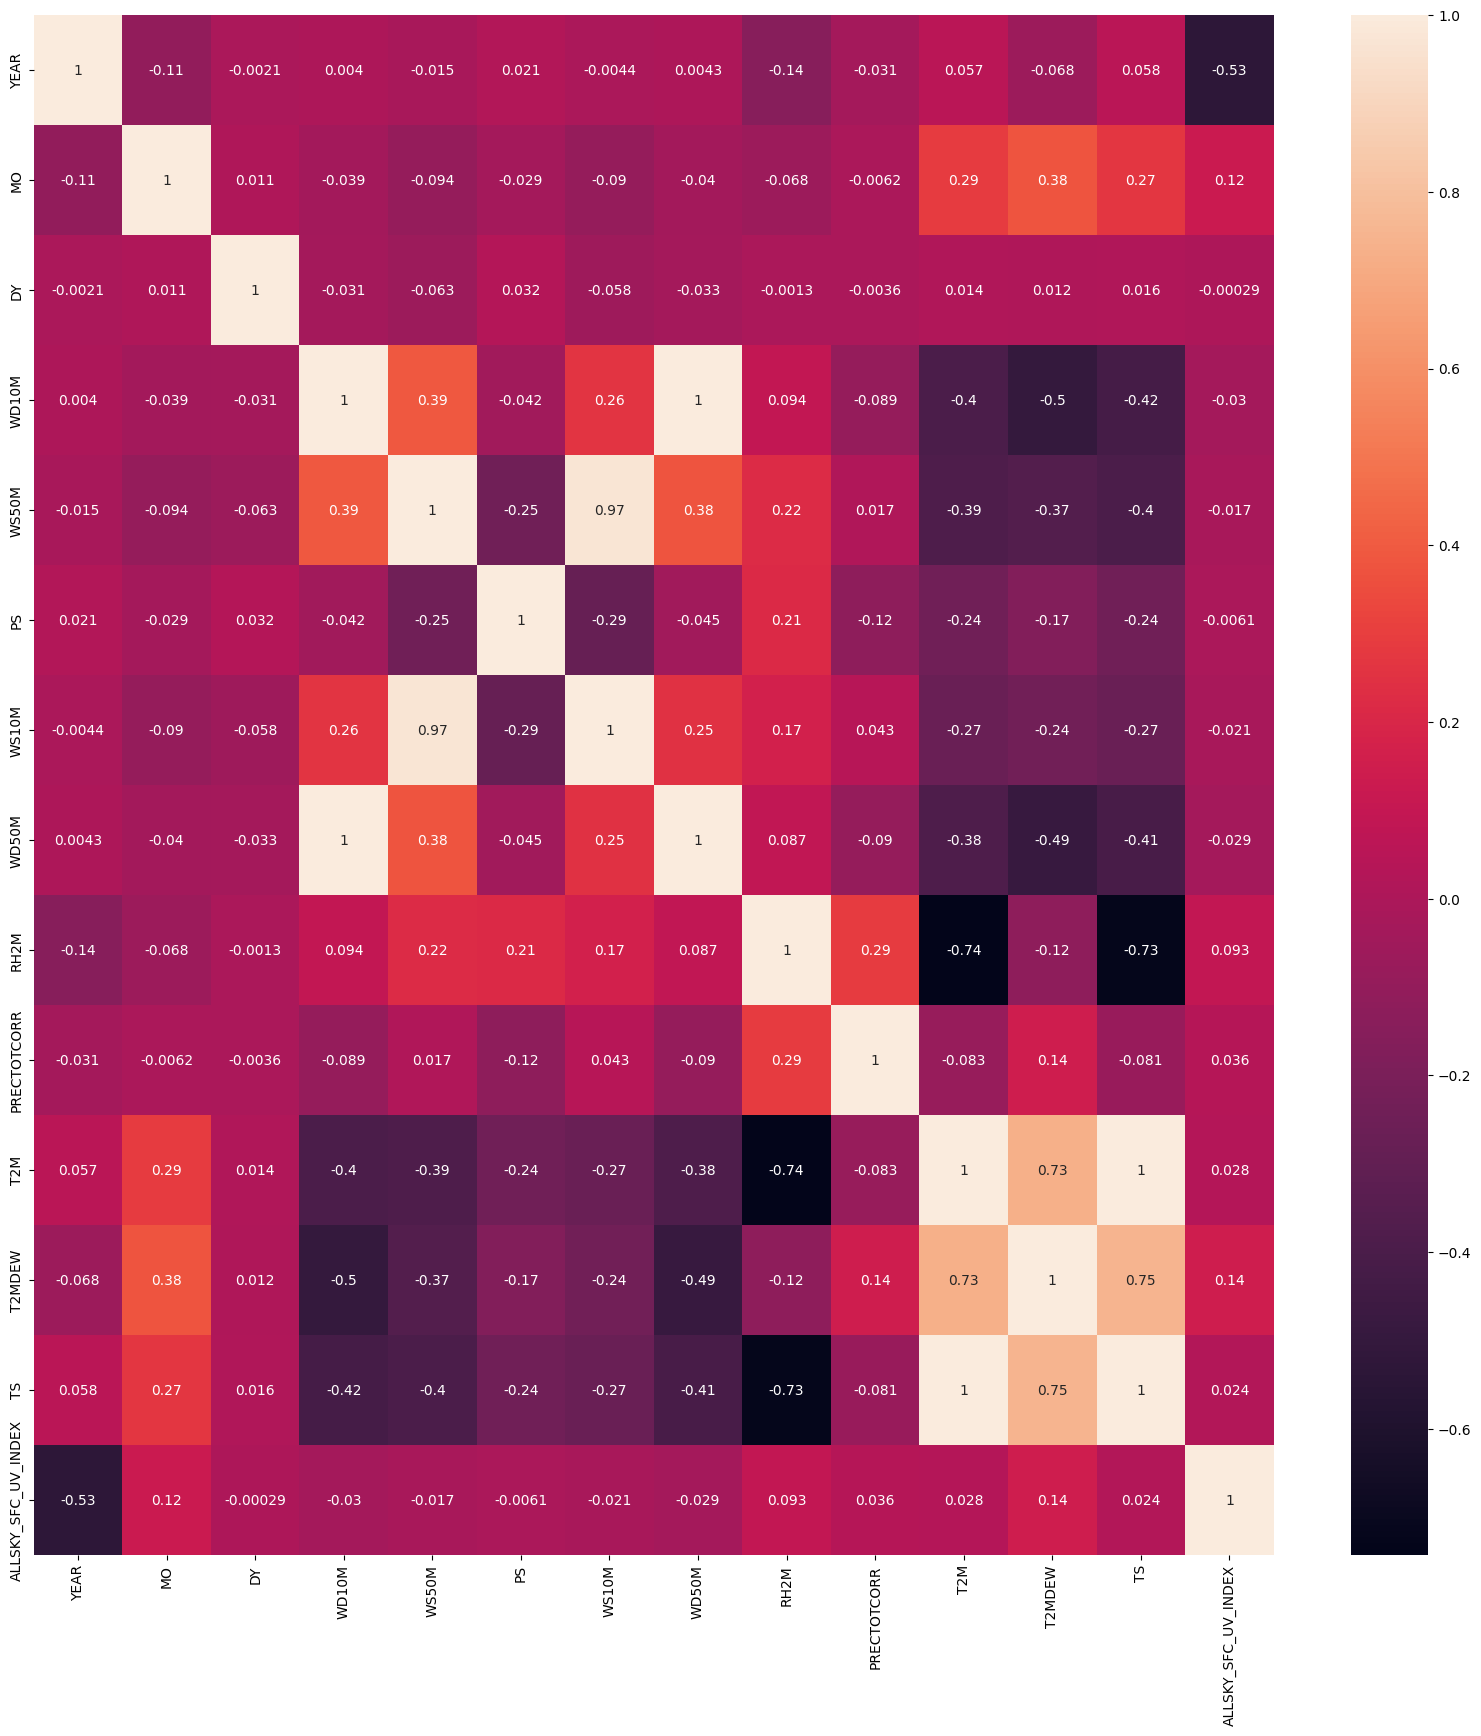

In [50]:
correlations = weather_df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

#There seems to be no direct correlations between factors

In [51]:
weather_df.columns

Index(['YEAR', 'MO', 'DY', 'WD10M', 'WS50M', 'PS', 'WS10M', 'WD50M', 'RH2M',
       'PRECTOTCORR', 'T2M', 'T2MDEW', 'TS', 'ALLSKY_SFC_UV_INDEX'],
      dtype='object')